In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras import layers,models
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout,Input
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle
import itertools
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2


import warnings
import cv2
import PIL
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
from tensorflow.keras.layers import Dense, Input, ZeroPadding2D, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.activations import relu, softmax
from sklearn.metrics import classification_report
from tensorflow.keras.utils import plot_model

In [2]:
# train_dir = r'/content/drive/MyDrive/Srija_Dissertation_2024/Brain_tumor_dataset/Training/'
# test_dir= r'/content/drive/MyDrive/Srija_Dissertation_2024/Brain_tumor_dataset/Testing/'
# ###Uncomment this last two codes if using google colab

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [5]:
train_dir = r'/Users/srijakarmakar/Documents/Brain_tumor/Brain_tumor_dataset/Training/'
test_dir= r'/Users/srijakarmakar/Documents/Brain_tumor/Brain_tumor_dataset/Testing/'

In [6]:
def count_image_per_class(directory):
    class_counts={}
    for class_name in os.listdir(directory):
        class_dir=os.path.join(directory,class_name)
        if os.path.isdir(class_dir):
            images_count=len(os.listdir(class_dir))
            class_counts[class_name]=images_count
    return class_counts


In [7]:
##count images per class in training set
train_class_counts=count_image_per_class(train_dir)
##count images per class in test set
test_class_counts=count_image_per_class(test_dir)

In [8]:
train_class_counts

{'pituitary': 1457, 'notumor': 1595, 'glioma': 1321, 'meningioma': 1339}

In [9]:
test_class_counts

{'pituitary': 300, 'notumor': 405, 'glioma': 300, 'meningioma': 306}

In [10]:
classes=list(train_class_counts.keys())
print(f"Number of classes {classes}")
train_counts=list(train_class_counts.values())
test_counts=list(test_class_counts.values())
print(f"Number of training images in each classes {train_counts}")
print(f"Number of Testing images in each classes {test_counts}")

Number of classes ['pituitary', 'notumor', 'glioma', 'meningioma']
Number of training images in each classes [1457, 1595, 1321, 1339]
Number of Testing images in each classes [300, 405, 300, 306]


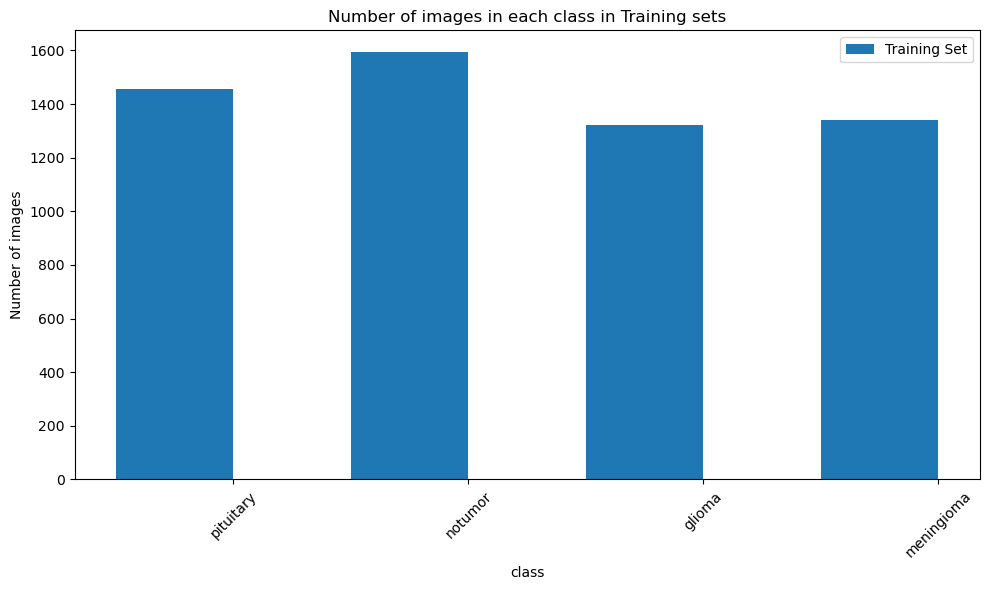

In [11]:
##--plotting--##
plt.figure(figsize=(10,6))
bar_width=0.5
index=range(len(classes))
plt.bar(index,train_counts,bar_width,label="Training Set")
plt.xlabel('class')
plt.ylabel('Number of images')
plt.title("Number of images in each class in Training sets")
plt.xticks([i+bar_width/2 for i in index],classes,rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

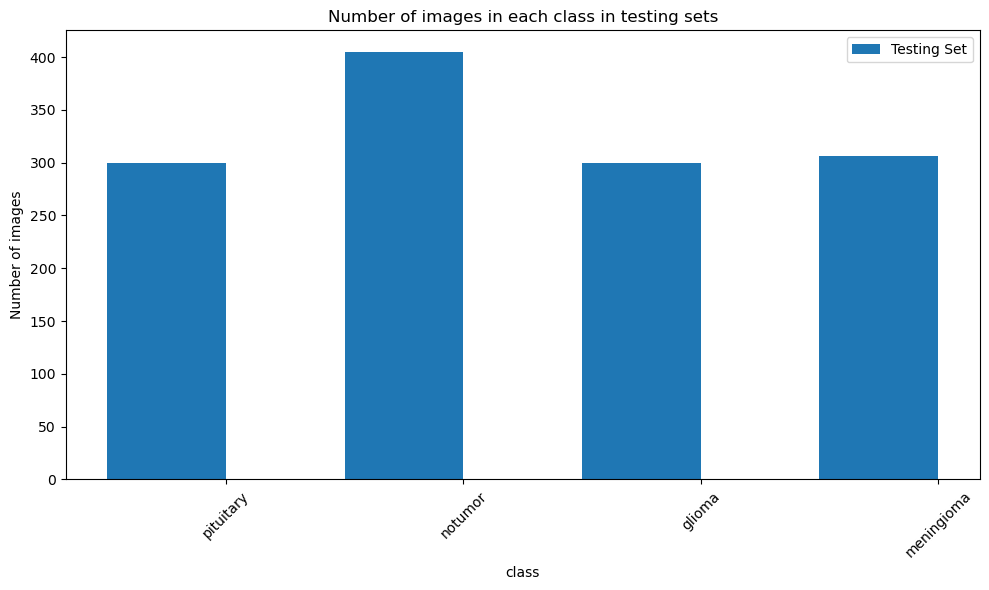

In [12]:
##--plotting--##
plt.figure(figsize=(10,6))
bar_width=0.5
index=range(len(classes))
plt.bar(index,test_counts,bar_width,label="Testing Set")
plt.xlabel('class')
plt.ylabel('Number of images')
plt.title("Number of images in each class in testing sets")
plt.xticks([i+bar_width/2 for i in index],classes,rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
train_dataset = image_dataset_from_directory(
    directory=train_dir,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=30
)

val_dataset = image_dataset_from_directory(
    directory=train_dir,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    image_size=(150, 150),
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=30
)

test_dataset = image_dataset_from_directory(
    directory=test_dir,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    image_size=(150, 150),
    shuffle=False
)


Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [14]:
classes = train_dataset.class_names
print(classes)

# Create reverse mapping of classes
reverse_classes = {val: key for key, val in enumerate(classes)}
print(reverse_classes)

['glioma', 'meningioma', 'notumor', 'pituitary']
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [15]:
reverse_classes.values()

dict_values([0, 1, 2, 3])

In [16]:
train_iterator = iter(train_dataset)
x_batch, y_batch = next(train_iterator)
print(x_batch.shape, y_batch.shape)


(32, 150, 150, 3) (32,)


2024-06-25 00:16:29.448082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


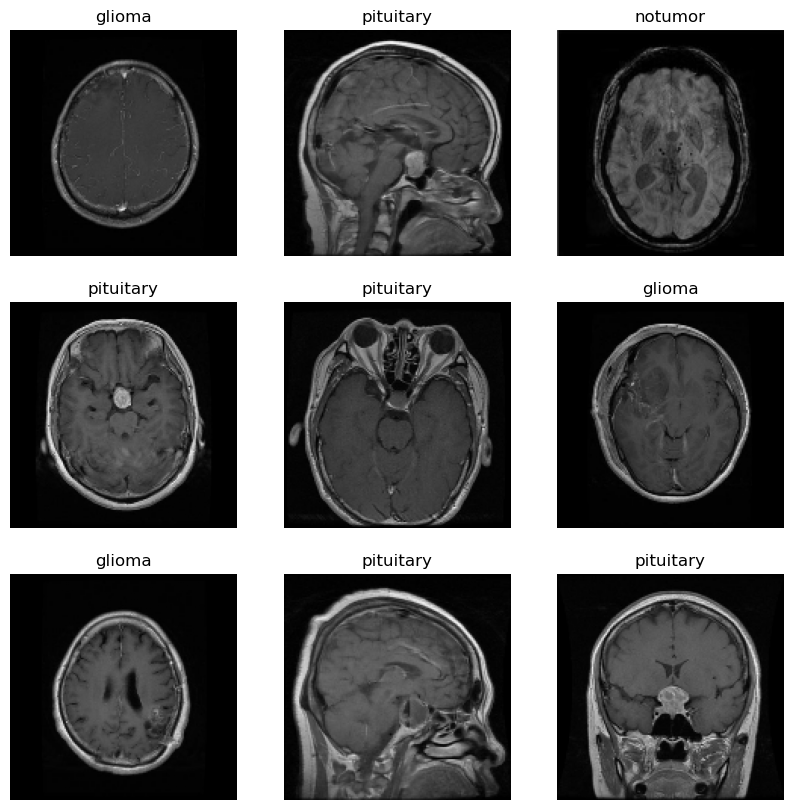

In [17]:
plt.figure(figsize = (10, 10))

for images, label in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy()/255)
        plt.title(train_dataset.class_names[label[i]])
        plt.axis("off")
        
        


In [18]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

train_labels = []

# Iterate through the train_dataset to extract labels
for images, labels in train_dataset:
    train_labels.extend(labels.numpy())

# Convert train_labels to numpy array
train_labels = np.array(train_labels)

2024-06-25 00:16:30.541730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
np.unique(train_labels)

array([0, 1, 2, 3], dtype=int32)

In [20]:
class_weights=compute_class_weight(class_weight="balanced", classes=np.unique(train_labels), y=train_labels)

In [21]:
class_weights

array([1.09539789, 1.0717636 , 0.88087895, 0.98152921])

In [22]:
class_weights_dict = dict(zip(np.unique(train_labels), class_weights))

print("Class weights:", class_weights_dict)

Class weights: {0: 1.0953978906999042, 1: 1.0717636022514072, 2: 0.8808789514263685, 3: 0.9815292096219931}


In [23]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_dataset = train_dataset.cache().prefetch(buffer_size = AUTOTUNE)
# val_dataset = val_dataset.cache().prefetch(buffer_size = AUTOTUNE)


In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='input',  # Use 'input' to pass the original image as well for boundary detection
    color_mode='rgb'  # Ensure this matches your input_shape in the UNET model
)

validation_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='input',  # Use 'input' to pass the original image as well for boundary detection
    color_mode='rgb'  # Ensure this matches your input_shape in the UNET model
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [26]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model

def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def encoder_block(inputs, num_filters):
    x = conv_block(inputs, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p

def decoder_block(inputs, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, 2, strides=2, padding="same")(inputs)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    # print(s1.shape, s2.shape, s3.shape, s4.shape)
    # print(p1.shape, p2.shape, p3.shape, p4.shape)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)

    model = Model(inputs, outputs, name="UNET")
    return model

if __name__ == "__main__":
    input_shape = (128, 128, 3)
    model = build_unet(input_shape)
    model.summary()


Model: "UNET"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 64, 64,    │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 32, 32,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │      1,024 │ conv2d_4[0][0]  

 Total params: 31,055,297 (118.47 MB)

 Trainable params: 31,043,521 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [29]:
from tensorflow.keras.optimizers import Adam

# Define your learning rate
learning_rate = 1e-4

# Create the Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile your model, using the created optimizer
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',  # Adjust as necessary
              metrics=['accuracy'])


In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust number of epochs as needed
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 128, 128, 3), output.shape=(None, 128, 128, 1)

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example of predicting on test data and visualizing tumor boundaries
test_iterator = iter(test_generator)
test_images, _ = next(test_iterator)

predicted_masks = model.predict(test_images)  # Predict segmentation masks

# Visualize some example images and their predicted masks
n = 5  # Number of images to visualize
plt.figure(figsize=(15, 10))
for i in range(n):
    plt.subplot(3, n, i + 1)
    plt.imshow(test_images[i])
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(3, n, n + i + 1)
    plt.imshow(np.squeeze(predicted_masks[i]), cmap='gray')
    plt.title('Predicted Mask')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
from tensorflow.keras.layers import Input, Conv2D, Dense, Reshape, Flatten, Multiply, Lambda, Dropout
from tensorflow.keras.models import Model
import keras.backend as K
import numpy as np

def squash(vectors, axis=-1):
    s_squared_norm = K.sum(K.square(vectors), axis, keepdims=True)
    scale = s_squared_norm / (1 + s_squared_norm)
    return scale * vectors / K.sqrt(s_squared_norm + K.epsilon())

def margin_loss(y_true, y_pred):
    L = y_true * K.square(K.maximum(0., 0.9 - y_pred)) + \
        0.5 * (1 - y_true) * K.square(K.maximum(0., y_pred - 0.1))
    return K.mean(K.sum(L, 1))

class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsules, dim_capsules, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.dim_capsules = dim_capsules
        self.routings = routings

    def build(self, input_shape):
        self.input_num_capsules = input_shape[1]
        self.input_dim_capsules = input_shape[2]
        self.kernel = self.add_weight(shape=(self.input_dim_capsules, self.num_capsules * self.dim_capsules),
                                      initializer='glorot_uniform',
                                      name='kernel')
        super(CapsuleLayer, self).build(input_shape)

    def call(self, inputs):
        inputs_hat = K.map_fn(lambda x: K.dot(x, self.kernel), elems=inputs)
        inputs_hat = K.reshape(inputs_hat, (-1, self.input_num_capsules, self.num_capsules, self.dim_capsules))
        inputs_hat_stopped = K.stop_gradient(inputs_hat)
        
        b = tf.zeros_like(inputs_hat[:, :, :, 0])
        assert self.routings > 0, 'The routings should be > 0.'
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=2)
            if i == self.routings - 1:
                outputs = squash(K.sum(c[..., tf.newaxis] * inputs_hat, 1))
            else:
                outputs = squash(K.sum(c[..., tf.newaxis] * inputs_hat_stopped, 1))
                b += K.sum(inputs_hat * outputs[:, tf.newaxis, :, :], -1)

        return K.reshape(outputs, [-1, self.num_capsules, self.dim_capsules])

class Length(layers.Layer):
    def call(self, inputs, **kwargs):
        return K.sqrt(K.sum(K.square(inputs), -1) + K.epsilon())

input_image = Input(shape=(150, 150, 3))
conv1 = Conv2D(64, (9, 9), strides=1, padding='valid', activation='relu')(input_image)
primary_caps = Conv2D(256, (9, 9), strides=2, padding='valid', activation='relu')(conv1)
primary_caps = Reshape((-1, 8))(primary_caps)
primary_caps_squashed = Lambda(squash)(primary_caps)

digit_caps = CapsuleLayer(num_capsules=8, dim_capsules=32, routings=5, name='digit_caps')(primary_caps_squashed)
digit_caps = Dropout(0.25)(digit_caps)

# Additional Capsule Layer
digit_caps_2 = CapsuleLayer(num_capsules=4, dim_capsules=16, routings=3, name='digit_caps_2')(digit_caps)

# Length layer and decoder network (example)
out_caps = Length(name='out_caps')(digit_caps_2)

# Decoder network
y = Input(shape=(4,))
y_reshaped = Reshape((4, 1))(y)
y_tiled = Lambda(lambda x: K.tile(x, [1, 8, 1]))(y_reshaped)  # Tile y to match the shape of digit_caps
y_tiled = Lambda(lambda x: K.permute_dimensions(x, (0, 2, 1)))(y_tiled)  # Permute dimensions for element-wise multiplication
masked_by_y = Multiply()([digit_caps, y_tiled])
masked = Lambda(lambda z: K.batch_flatten(z))(masked_by_y)

decoder = models.Sequential(name='decoder')
decoder.add(Dense(512, activation='relu', input_dim=8 * 32))  # Adjust input_dim to match the shape of masked
decoder.add(Dense(1024, activation='relu'))
decoder.add(Dense(np.prod([64, 64, 3]), activation='sigmoid'))
decoder.add(Reshape(target_shape=[64, 64, 3], name='out_recon'))

train_model = Model([input_image, y], [out_caps, decoder(masked)])
train_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=[margin_loss, 'mse'], metrics=['accuracy'])

train_model.summary()


In [ ]:
def resize_images(images, target_size=(150, 150)):
    return np.array([tf.image.resize(image, target_size).numpy() for image in images])

def create_capsule_data(dataset, target_size=(150, 150)):
    x_data, y_data = [], []
    for images, labels in dataset:
        resized_images = resize_images(images.numpy(), target_size)
        x_data.append(resized_images)
        y_data.append(tf.one_hot(labels, depth=4).numpy())
    return np.concatenate(x_data, axis=0), np.concatenate(y_data, axis=0)

def create_decoder_data(dataset, target_size=(64, 64)):
    x_data = []
    for images, labels in dataset:
        resized_images = resize_images(images.numpy(), target_size)
        x_data.append(resized_images)
    return np.concatenate(x_data, axis=0)

# Ensure dataset objects are defined as train_dataset, val_dataset, test_dataset
x_train_capsule, y_train_capsule = create_capsule_data(train_dataset)
x_val_capsule, y_val_capsule = create_capsule_data(val_dataset)
x_test_capsule, y_test_capsule = create_capsule_data(test_dataset)

x_train_decoder = create_decoder_data(train_dataset, target_size=(64, 64))
x_val_decoder = create_decoder_data(val_dataset, target_size=(64, 64))
x_test_decoder = create_decoder_data(test_dataset, target_size=(64, 64))

In [ ]:
history = train_model.fit([x_train_capsule, y_train_capsule], [y_train_capsule, x_train_decoder], 
                          validation_data=([x_val_capsule, y_val_capsule], [y_val_capsule, x_val_decoder]), 
                          epochs=5, batch_size=32)
